## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
x=np.linspace(0,20)

In [3]:
y=-x+2

#### Plot your data points. 

Text(0, 0.5, 'y')

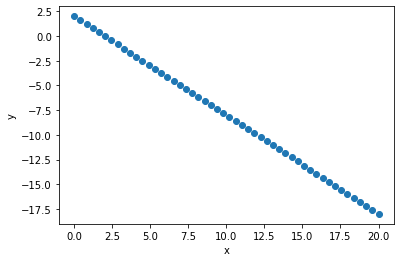

In [4]:
plt.plot(x,y,"o")
plt.xlabel("x")
plt.ylabel("y")

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

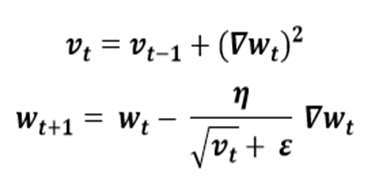

In [5]:
def Adagrad(X,Y,Max_Epochs,alpha=0.001,epsilon=0.001):
    # 1.  Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate.
    theta_0=0
    theta_1=0
    v0=0
    v1=0
    loss=[]
    th0_list=[]
    th1_list=[]
    Y_predict_list=[]
   
    #Loop for max no of epochs
    for e in range(Max_Epochs):
        print("==============================================================")
        print("epoch ",e)
        
    
        #2. Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.
       
        Y_predict=theta_0 + theta_1 *X
        Y_predict_list.append(Y_predict)
        #3. Calculate Cost function 𝑱(theta_0,theta_1 ).
        error=Y_predict - Y
        
        cost= (np.dot(error,error))/(2*len(X))
        loss.append(cost)

        print("Cost= " , cost)
        #4.  Calculate gradient of theta_0 and theta_1

        Grad_theta_0=(Y_predict - Y).sum()/(len(X))
        Grad_theta_1=(np.dot((Y_predict-Y),X) )/(len(X))

        #5. Update the parameters (simultaneously).
        v0 = v0 + ((Grad_theta_0)**2)
        v1 = v1 + ((Grad_theta_1)**2)
        
        theta_0 =theta_0 - (alpha/(np.sqrt(v0)+epsilon))*Grad_theta_0

        theta_1= theta_1 - (alpha/(np.sqrt(v1)+epsilon))*Grad_theta_1
        
        th0_list.append(theta_0)
        th1_list.append(theta_1)
        
        #stop condition 
        if(e!=0):
            if (abs(loss[e-1]-loss[e])<0.001):
                break
        

    
    return  th0_list, th1_list,loss,Y_predict,theta_0,theta_1 

In [6]:
th0_list, th1_list,loss,Y_predict,theta_0,theta_1 =Adagrad(x,y,1000,alpha=0.9,epsilon=0.0001)

epoch  0
Cost=  49.34693877551021
epoch  1
Cost=  1.9784358263931978
epoch  2
Cost=  0.9627526070944444
epoch  3
Cost=  0.8975743268153
epoch  4
Cost=  0.8512499153949734
epoch  5
Cost=  0.807667922614294
epoch  6
Cost=  0.7664196728756668
epoch  7
Cost=  0.7273654670363848
epoch  8
Cost=  0.6903796109911454
epoch  9
Cost=  0.6553445392719204
epoch  10
Cost=  0.6221502095278912
epoch  11
Cost=  0.5906935238346165
epoch  12
Cost=  0.560877815204472
epoch  13
Cost=  0.532612378646181
epoch  14
Cost=  0.5058120434834849
epoch  15
Cost=  0.4803967824366695
epoch  16
Cost=  0.4562913537120367
epoch  17
Cost=  0.43342497277010184
epoch  18
Cost=  0.41173101083670877
epoch  19
Cost=  0.3911467175593325
epoch  20
Cost=  0.37161296550507517
epoch  21
Cost=  0.35307401445325326
epoch  22
Cost=  0.33547729365945633
epoch  23
Cost=  0.31877320046408325
epoch  24
Cost=  0.30291491379050656
epoch  25
Cost=  0.28785822122941573
epoch  26
Cost=  0.27356135853935426
epoch  27
Cost=  0.25998486051134617

In [7]:
r2_score(y,Y_predict)

0.9989103700426131

Text(0, 0.5, 'loss')

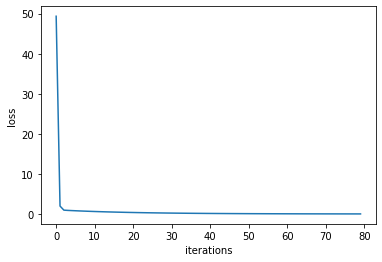

In [8]:
plt.plot(loss)
plt.xlabel("iterations")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

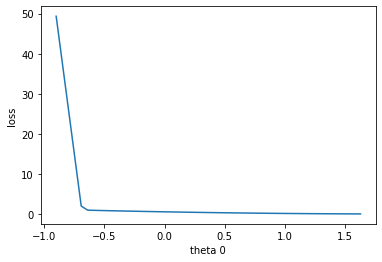

In [9]:
plt.plot(th0_list,loss)
plt.xlabel("theta 0")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

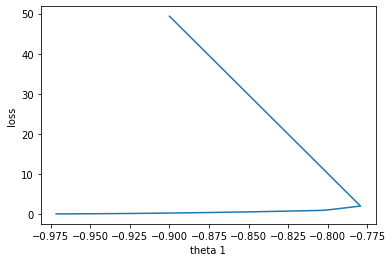

In [10]:
plt.plot(th1_list,loss)
plt.xlabel("theta 1")
plt.ylabel("loss")

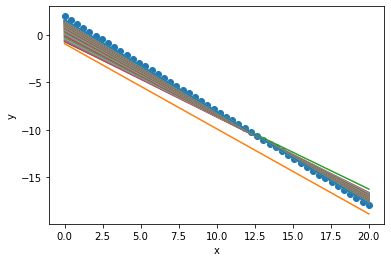

In [11]:
plt.plot(x,y,'o')
plt.ylabel("y")
plt.xlabel("x")

for i in range(len(th0_list)):
    plt.plot(x,th0_list[i]+th1_list[i]*x)
    
    
plt.show()

Text(0, 0.5, 'y')

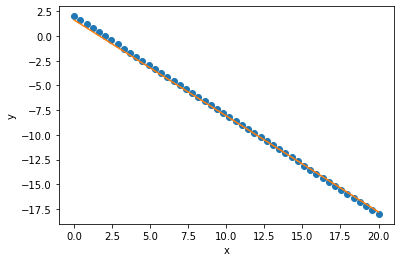

In [12]:
plt.plot(x,y,"o")
plt.plot(x,Y_predict)
plt.xlabel("x")
plt.ylabel("y")

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

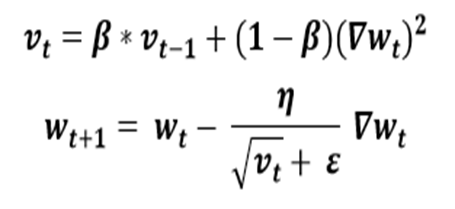

In [13]:
def RMSProp(X,Y,Max_Epochs,beta,alpha=0.001,epsilon=0.001):
    # 1.  Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate.
    theta_0=0
    theta_1=0
    v0=0
    v1=0
    loss=[]
    th0_list=[]
    th1_list=[]
    Y_predict_list=[]
   
    #Loop for max no of epochs
    for e in range(Max_Epochs):
        print("==============================================================")
        print("epoch ",e)
        
    
        #2. Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.
       
        Y_predict=theta_0 + theta_1 *X
        Y_predict_list.append(Y_predict)
        #3. Calculate Cost function 𝑱(theta_0,theta_1 ).
        error=Y_predict - Y
        
        cost= (np.dot(error,error))/(2*len(X))
        loss.append(cost)

        print("Cost= " , cost)
        #4.  Calculate gradient of theta_0 and theta_1

        Grad_theta_0=(Y_predict - Y).sum()/(len(X))
        Grad_theta_1=(np.dot((Y_predict-Y),X) )/(len(X))

        #5. Update the parameters (simultaneously).
        v0 = beta* v0 +(1-beta)*( (Grad_theta_0)**2)
        v1 = beta* v1 + (1-beta)*((Grad_theta_1)**2)
        
        theta_0 =theta_0 - (alpha/(np.sqrt(v0)+epsilon))*Grad_theta_0

        theta_1= theta_1 - (alpha/(np.sqrt(v1)+epsilon))*Grad_theta_1
        
        th0_list.append(theta_0)
        th1_list.append(theta_1)
        
        #stop condition 
        if(e!=0):
            if (abs(loss[e-1]-loss[e])<0.001):
                break
        

    
    return  th0_list, th1_list,loss,Y_predict,theta_0,theta_1 

In [14]:
th0_list_RMS, th1_list_RMS,loss_RMS,Y_predict_RMS,theta_0_RMS,theta_1_RMS=RMSProp(x,y,1000,0.6,alpha=0.01,epsilon=0.001)

epoch  0
Cost=  49.34693877551021
epoch  1
Cost=  47.42648892275923
epoch  2
Cost=  45.9471175520233
epoch  3
Cost=  44.63649594556683
epoch  4
Cost=  43.413877835045234
epoch  5
Cost=  42.244996265956715
epoch  6
Cost=  41.112861959655675
epoch  7
Cost=  40.00834304329374
epoch  8
Cost=  38.92630385277135
epoch  9
Cost=  37.863778847062896
epoch  10
Cost=  36.81902810127013
epoch  11
Cost=  35.7910204457114
epoch  12
Cost=  34.77914046989485
epoch  13
Cost=  33.78301875445505
epoch  14
Cost=  32.802432167664335
epoch  15
Cost=  31.83724482313995
epoch  16
Cost=  30.887372937908225
epoch  17
Cost=  29.952763850015895
epoch  18
Cost=  29.03338346541724
epoch  19
Cost=  28.129208737621287
epoch  20
Cost=  27.24022315749189
epoch  21
Cost=  26.366414045308183
epoch  22
Cost=  25.507770922472904
epoch  23
Cost=  24.66428453010349
epoch  24
Cost=  23.835946235148196
epoch  25
Cost=  23.022747668518882
epoch  26
Cost=  22.22468050196263
epoch  27
Cost=  21.44173630769543
epoch  28
Cost=  20.

In [15]:
r2_score(y,Y_predict_RMS)

0.953994836104475

Text(0, 0.5, 'loss')

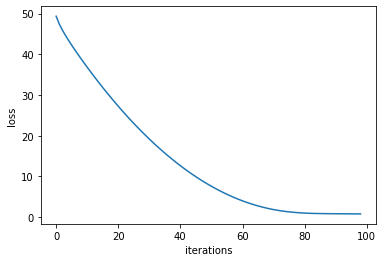

In [16]:
plt.plot(loss_RMS)
plt.xlabel("iterations")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

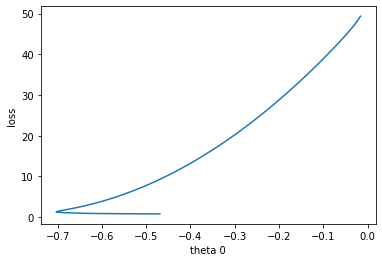

In [17]:
plt.plot(th0_list_RMS,loss_RMS)
plt.xlabel("theta 0")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

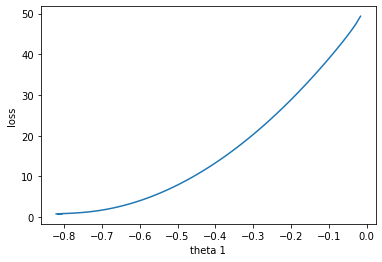

In [18]:
plt.plot(th1_list_RMS,loss_RMS)
plt.xlabel("theta 1")
plt.ylabel("loss")

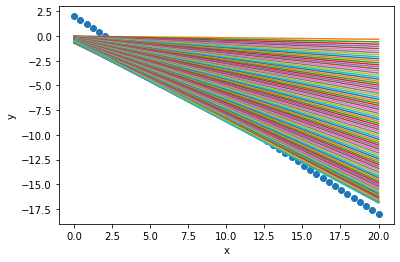

In [19]:
plt.plot(x,y,'o')
plt.ylabel("y")
plt.xlabel("x")

for i in range(len(th0_list_RMS)):
    plt.plot(x,th0_list_RMS[i]+th1_list_RMS[i]*x)
    
    
plt.show()

Text(0, 0.5, 'y')

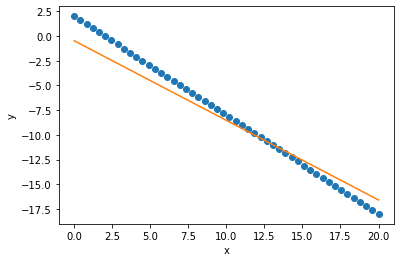

In [20]:
plt.plot(x,y,"o")
plt.plot(x,Y_predict_RMS)
plt.xlabel("x")
plt.ylabel("y")

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

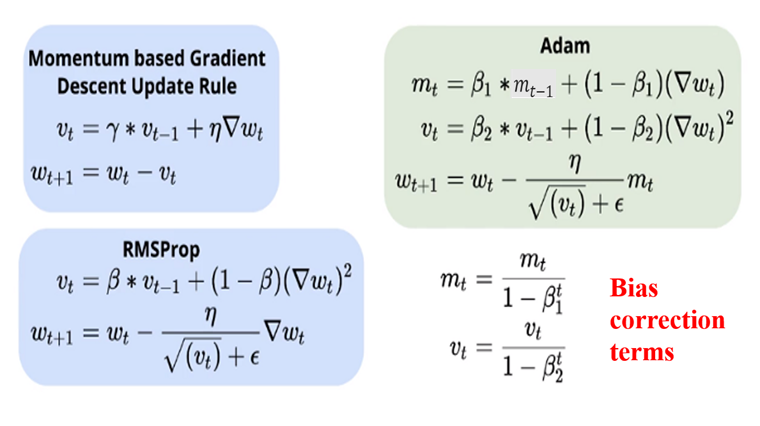

In [21]:
def ADAM(X,Y,Max_Epochs,beta_1,beta_2,alpha=0.001,epsilon=0.001):
    # 1.  Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate.
    theta_0=0
    theta_1=0
    v0=0
    v1=0
    m0=0
    m1=0
    loss=[]
    th0_list=[]
    th1_list=[]
    Y_predict_list=[]
   
    #Loop for max no of epochs
    for e in range(Max_Epochs):
        print("==============================================================")
        print("epoch ",e)
        
    
        #2. Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.
       
        Y_predict=theta_0 + theta_1 *X
        Y_predict_list.append(Y_predict)
        #3. Calculate Cost function 𝑱(theta_0,theta_1 ).
        error=Y_predict - Y
        
        cost= (np.dot(error,error))/(2*len(X))
        loss.append(cost)

        print("Cost= " , cost)
        #4.  Calculate gradient of theta_0 and theta_1

        Grad_theta_0=(Y_predict - Y).sum()/(len(X))
        Grad_theta_1=(np.dot((Y_predict-Y),X) )/(len(X))

        #5. Update the parameters (simultaneously).
        
        m0=beta_1 * m0 +(1-beta_1)*Grad_theta_0
        m1=beta_1 * m1 + (1-beta_1)*Grad_theta_1
        
        v0 = beta_2* v0 +(1-beta_2)*( (Grad_theta_0)**2)
        v1 = beta_2* v1 + (1-beta_2)*((Grad_theta_1)**2)
        
        theta_0 =theta_0 - (alpha*m0/(np.sqrt(v0)+epsilon))

        theta_1= theta_1 - (alpha*m1/(np.sqrt(v1)+epsilon))
        
        th0_list.append(theta_0)
        th1_list.append(theta_1)
        
        #stop condition 
        if(e!=0):
            if (abs(loss[e-1]-loss[e])<0.001):
                break
        

    
    return  th0_list, th1_list,loss,Y_predict,theta_0,theta_1 

In [22]:
th0_list_adam, th1_list_adam,loss_adam,Y_predict_adam,theta_0_abam,theta_1_adam =ADAM(x,y,100,0.6,0.6,alpha=0.1,epsilon=0.00001)

epoch  0
Cost=  49.34693877551021
epoch  1
Cost=  41.89848620347874
epoch  2
Cost=  33.3756671653334
epoch  3
Cost=  25.12083595807453
epoch  4
Cost=  17.76756938950949
epoch  5
Cost=  11.637945483385057
epoch  6
Cost=  6.889293944439986
epoch  7
Cost=  3.576490056429055
epoch  8
Cost=  1.6662105024745772
epoch  9
Cost=  1.0008071271505825
epoch  10
Cost=  1.1944854167254118
epoch  11
Cost=  1.570011759235194
epoch  12
Cost=  1.5510423576181742
epoch  13
Cost=  1.1932821395662696
epoch  14
Cost=  0.9016410466825411
epoch  15
Cost=  0.8955509818909567
epoch  16
Cost=  0.9335200517404548
epoch  17
Cost=  0.799394827831144
epoch  18
Cost=  0.7074059429573477
epoch  19
Cost=  0.6960235533145724
epoch  20
Cost=  0.6079492522497287
epoch  21
Cost=  0.579485710633385
epoch  22
Cost=  0.5098954257200772
epoch  23
Cost=  0.47589293095427565
epoch  24
Cost=  0.4212667025514867
epoch  25
Cost=  0.3735297207720081
epoch  26
Cost=  0.339140309185656
epoch  27
Cost=  0.3249785562370461
epoch  28
Cos

In [23]:
r2_score(y,Y_predict_adam)

0.9999141756396621

Text(0, 0.5, 'loss')

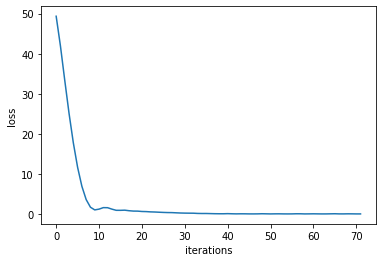

In [24]:
plt.plot(loss_adam)
plt.xlabel("iterations")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

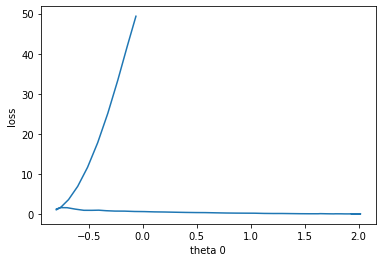

In [25]:
plt.plot(th0_list_adam,loss_adam)
plt.xlabel("theta 0")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

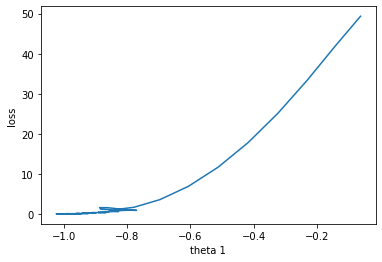

In [26]:
plt.plot(th1_list_adam,loss_adam)
plt.xlabel("theta 1")
plt.ylabel("loss")

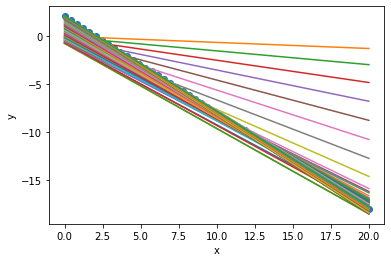

In [27]:
plt.plot(x,y,'o')
plt.ylabel("y")
plt.xlabel("x")

for i in range(len(th0_list_adam)):
    plt.plot(x,th0_list_adam[i]+th1_list_adam[i]*x)
    
    
plt.show()

Text(0, 0.5, 'y')

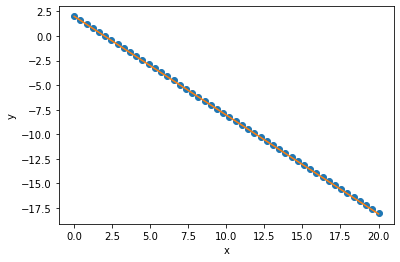

In [28]:
plt.plot(x,y,"o")
plt.plot(x,Y_predict_adam)
plt.xlabel("x")
plt.ylabel("y")

## Congratulations 
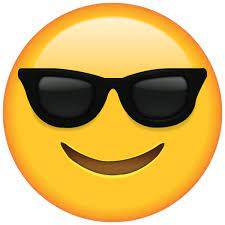